In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

In [2]:
# --- 2. SETUP FOR ACADEMIC STYLE ---

font1 = 18
font2 = 16
font3 = 20

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": font1,
    "axes.labelsize": font3,
    "legend.fontsize": font1,
    "xtick.labelsize": font2,
    "ytick.labelsize": font2,
    "figure.titlesize": font3,
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}",
    # Line Widths
    "lines.linewidth": 1.7, # Main plot lines
    "axes.linewidth": 1.,  # Axis spine width
    "grid.linewidth": 1.0,  # Grid line width
    
    # Tick/Marker Properties
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
})

## Load data

In [3]:
loc = "../local_data/he2_log2"
types = 'crx'

In [4]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [5]:
exact_energy = -5.74032428

In [6]:
en_min = np.min(energies_ng[:,:,:,-1], axis=2) - exact_energy

en_min

array([[0.03151061, 0.03449084, 0.03160264, 0.03454425, 0.03248384,
        0.0340183 , 0.03708627],
       [0.03021886, 0.02984311, 0.02876498, 0.02881267, 0.03105094,
        0.03192546, 0.03568628],
       [0.0291722 , 0.02888896, 0.03039958, 0.03131749, 0.03252294,
        0.03369071, 0.03696086],
       [0.03038289, 0.0289705 , 0.03044965, 0.03111579, 0.03320052,
        0.03410794, 0.03792121],
       [0.03023746, 0.03026321, 0.031554  , 0.03123882, 0.03274324,
        0.0355251 , 0.04459121],
       [0.03263881, 0.03243377, 0.03313424, 0.03306367, 0.03569581,
        0.03799178, 0.05071189],
       [0.04733445, 0.05233648, 0.04567697, 0.04814079, 0.05198028,
        0.07287099, 0.42409017]])

In [7]:
weights_lr_list = np.linspace(0.1, 0.001, 7)
phi_lr_list = np.linspace(0.1, 0.001, 7)

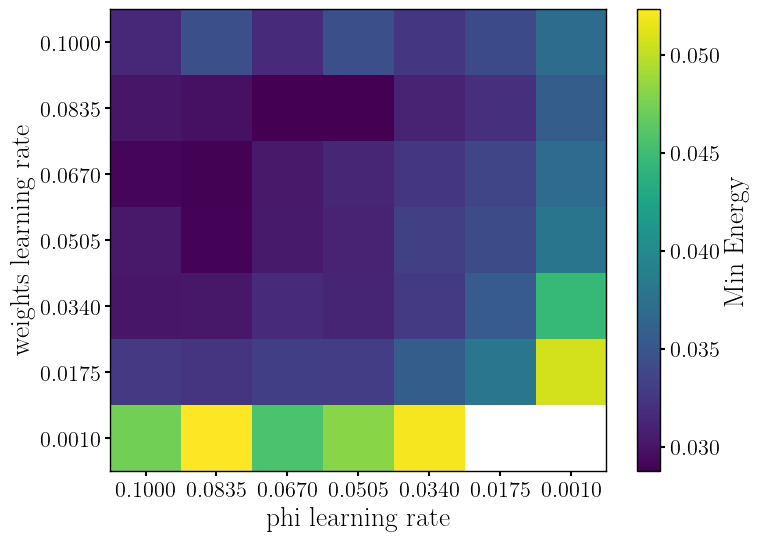

In [8]:
masked_en_min = np.where(en_min>0.07, np.nan, en_min)
plt.figure(figsize=(8, 6))
plt.imshow(masked_en_min, aspect='auto', cmap='viridis')
plt.colorbar(label='Min Energy')
plt.xticks(ticks=np.arange(len(phi_lr_list)), labels=[f"{lr:.4f}" for lr in phi_lr_list])
plt.yticks(ticks=np.arange(len(weights_lr_list)), labels=[f"{lr:.4f}" for lr in weights_lr_list])
plt.xlabel('phi learning rate')
plt.ylabel('weights learning rate')
plt.show()

In [9]:
xticks_list

NameError: name 'xticks_list' is not defined

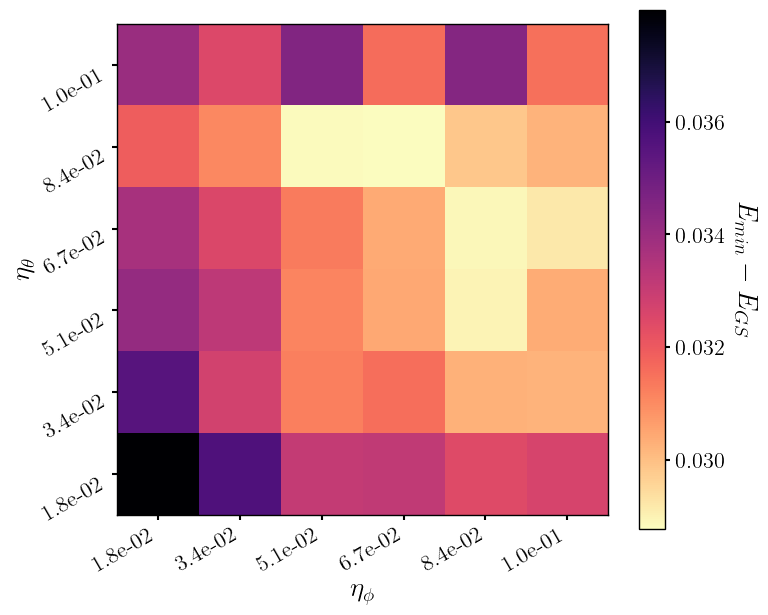

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# --- 2. PREPARE DATA FOR PLOTTING ---
# Mask values above a certain threshold to hide them in the plot
masked_en_min = np.where(en_min > 0.07, np.nan, en_min)

# As requested, exclude the last row of data from the plot
data_to_plot = masked_en_min[:-1, :-1][:, ::-1]
# Also slice the corresponding y-axis labels so they match
yticks_list = weights_lr_list[:-1]
xticks_list = phi_lr_list[:-1][::-1]

# --- 3. CREATE FIGURE AND AXES ---
# This gives us direct control over the figure and the axes (the plot area)
fig, ax = plt.subplots(figsize=(8, 7))

# --- 4. PLOT THE DATA (HEATMAP) ---
# Use ax.imshow() to draw the heatmap. We store the returned object to use for the colorbar.
im = ax.imshow(data_to_plot, cmap='magma_r')

# --- 5. STYLING AND LABELS ---
# Set the main labels for the axes
ax.set_xlabel(r'$\eta_{\phi}$')
ax.set_ylabel(r'$\eta_{\theta}$')

# Create a colorbar and attach it to the figure, linked to our plot
cbar = fig.colorbar(im, ax=ax, shrink=0.9)
cbar.set_label(r'$E_{min} - E_{GS}$', rotation=270, labelpad=25)

# Set the ticks and labels for X and Y axes
# We want a tick for each column/row of our data
ax.set_xticks(ticks=np.arange(len(xticks_list)))
ax.set_yticks(ticks=np.arange(len(yticks_list)))

# Set the labels for those ticks, formatted nicely
ax.set_xticklabels([f"{lr:.1e}" for lr in xticks_list], rotation=30, ha="right")
ax.set_yticklabels([f"{lr:.1e}" for lr in yticks_list], rotation=30, va="top")


# --- 6. FINALIZE AND SHOW/SAVE ---
# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

# To save the figure, uncomment the lines below
# name = "learning_rate_scan" 
fig.savefig("heatmap.pdf", format="pdf", bbox_inches='tight')
